In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#to ignore the warning
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('train.csv')

### Step 1. Reading, understanding and visualizing data

In [54]:
df.shape

(1460, 81)

In [55]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [57]:
#checking columns having missing values
df.loc[:,df.isnull().sum() > 0].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [58]:
#calculating missing value percentage
null_percent = round(df.loc[:,df.isnull().sum() > 0].isnull().sum()/len(df.index),2) * 100
null_percent

LotFrontage      18.0
Alley            94.0
MasVnrType        1.0
MasVnrArea        1.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinType2      3.0
Electrical        0.0
FireplaceQu      47.0
GarageType        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
PoolQC          100.0
Fence            81.0
MiscFeature      96.0
dtype: float64

##### Dropping columns if more than 25% of its data is missing

In [59]:
drop_cols = null_percent[null_percent > 25].keys()
drop_cols

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [60]:
df = df.drop(drop_cols, "columns")

In [61]:
df.shape

(1460, 76)

##### Skewness of the output variable

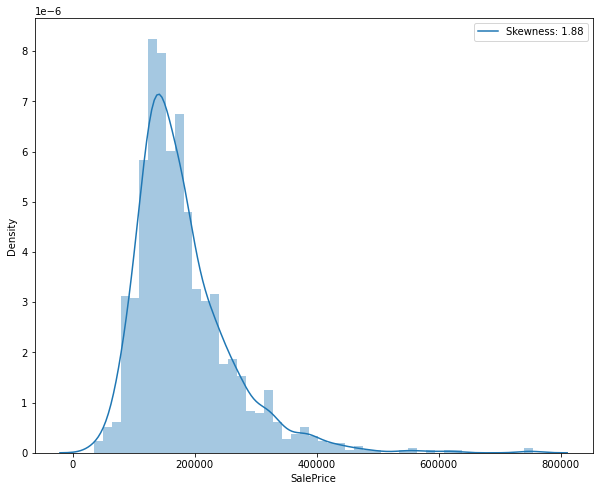

In [62]:
# Plot the distplot of target
plt.figure(figsize=(10,8))
bar = sns.distplot(df["SalePrice"])
bar.legend(["Skewness: {:.2f}".format(df['SalePrice'].skew())])



In [63]:
# Function for heatmap
def heat_map(df):
    plt.figure(figsize=(25,25))
    ax = dataplot=sns.heatmap(df.corr(), annot=True, linewidth=2) 
    # displaying heatmap
    plt.show()

In [64]:
df.shape

(1460, 76)

In [65]:
#drop_if_corr_more_than_75percent function

def drop_if_corr_more_than_75percent(df):
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

    # Drop features 
    df.drop(to_drop, axis=1, inplace=True)

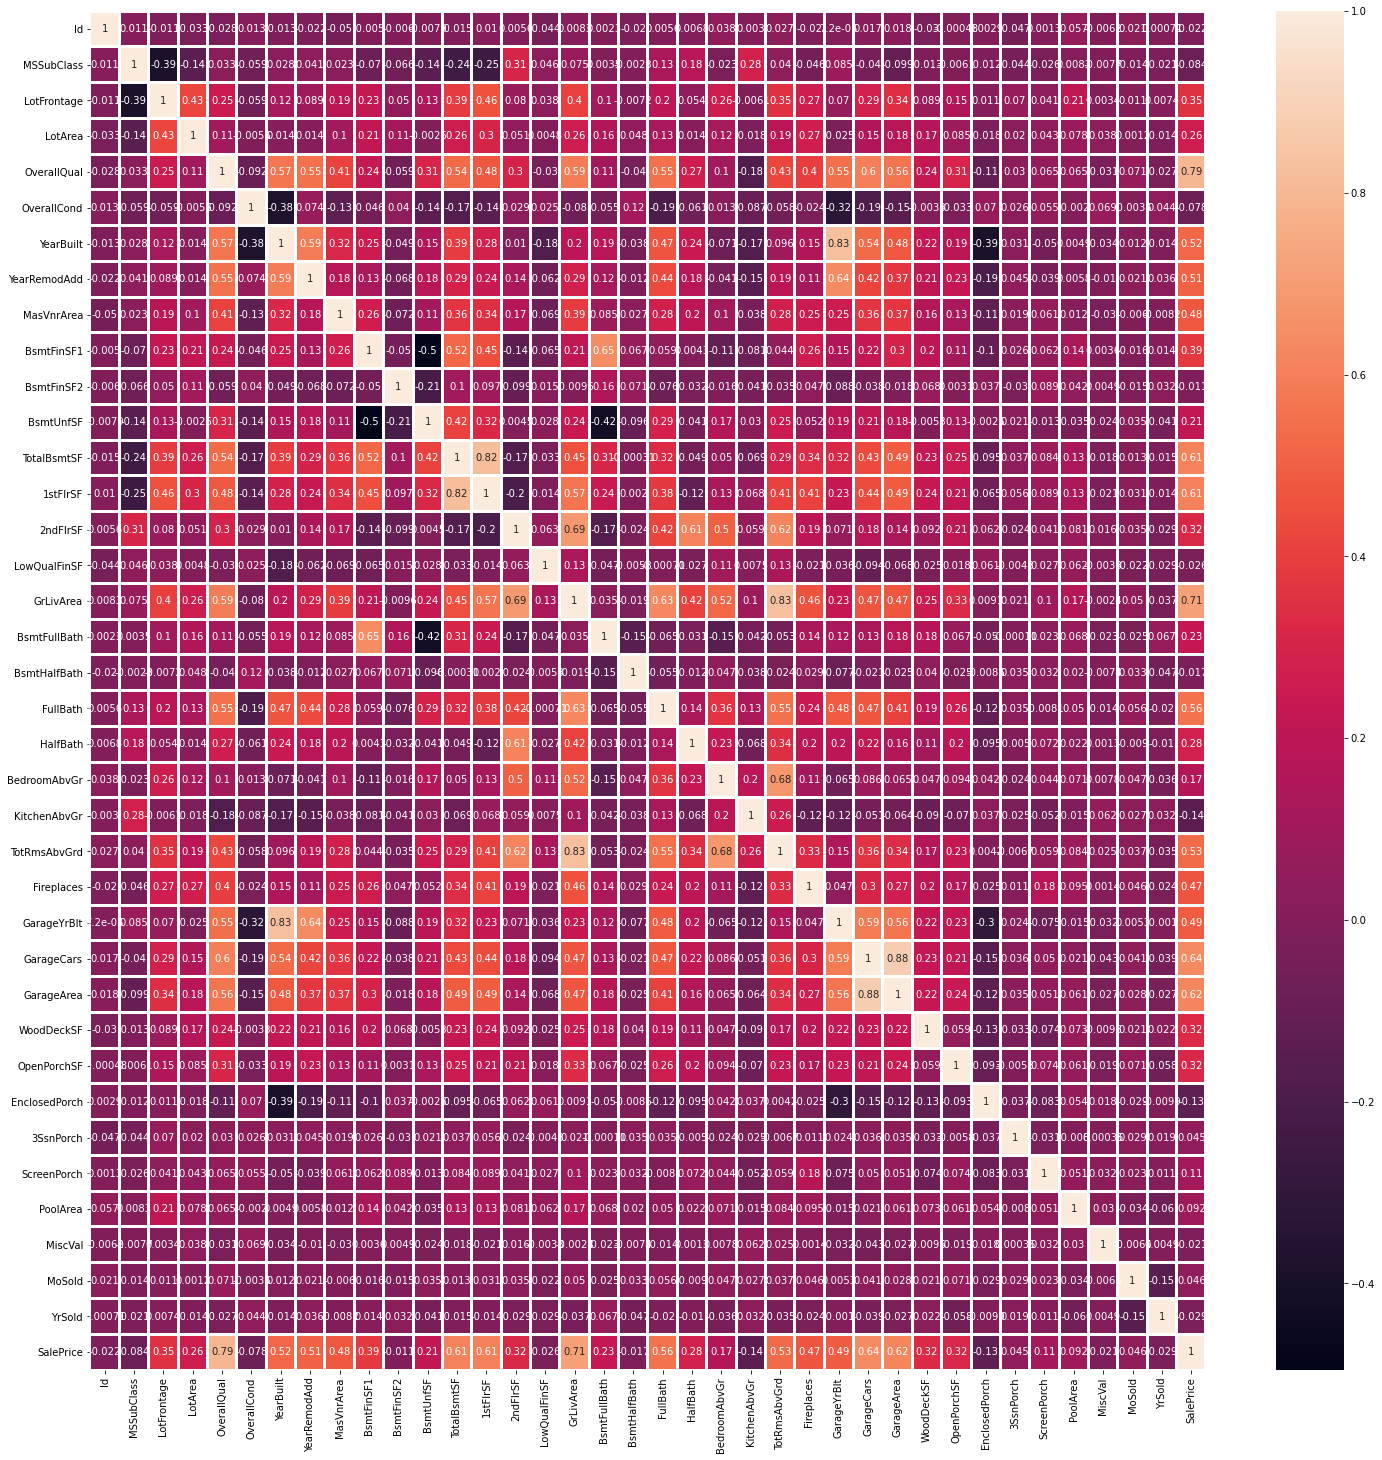

In [66]:
#visualising heatmap
heat_map(df)

In [67]:
df.shape

(1460, 76)

In [68]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [69]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [70]:
num_columns = df.select_dtypes(include=['float64','int64']).columns
num_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

##### Handling NA values

In [71]:
df.fillna({x:"0.0" for x in num_columns}, inplace=True) 

In [72]:
df.fillna({x:"Na" for x in object_columns}, inplace=True) 

##### Handling categorical variables

In [73]:
df_dummies = pd.get_dummies(object_columns, drop_first=True)
df_dummies.head()

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,...,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
df_dummies.shape

(38, 37)

In [75]:
# drop categorical variables 
df = df.drop(object_columns, axis=1, inplace=True)

In [76]:
df = pd.concat([df, df_dummies], axis=1)

#### Splitting into train and test

In [77]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(26, 37)
(12, 37)


#### Rescalling of variables

In [78]:
# 1. instantiate an object
scaler = MinMaxScaler()

# 2. fit on data
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])
df_train[num_columns].head()

KeyError: "None of [Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',\n       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',\n       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\n       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',\n       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',\n       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',\n       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',\n       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],\n      dtype='object')] are in the [columns]"

##### Dividing into X and y train sets for model building

In [ ]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [51]:
#Running RFE with the o/p number of variables equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 12)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').